In [114]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import StringIO
import glob

In [2]:
lev_dir = '/home/agolas/empire/RIPL/levels/z024.dat'
with open(lev_dir, 'r') as f:
    data = f.read()

In [5]:
lines = data.split('\n')

In [7]:
nuc_data = []
isotope = False
for line in lines:
    if '52Cr' in line:
        isotope = True
    if '53Cr' in line:
        break
    if isotope:
        nuc_data.append(line)

In [14]:
new_data = []
for line in nuc_data:
    if line.startswith('                                       '): continue
    
    new_line = line.strip()
    new_data.append(line)
    

In [17]:
x_data = []
y_data = []
for line in new_data[1:]:
    sline = line.split()
    index = sline[0]
    excitation_energy = sline[1]
    y_data.append(int(index))
    x_data.append(float(excitation_energy))
    


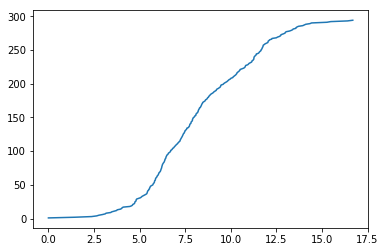

In [18]:
plt.plot(x_data, y_data)
plt.show()

In [19]:
Cr53_EGSM = """1902607.5601577759        3.72607040    
   1975784.7785949707        4.04073095    
   2048962.1162414551        4.38700724    
   2122139.2154693604        4.76779652    
   2195316.5531158447        5.18624020    
   2268493.6523437500        5.64573812    
   2341670.9899902344        6.14997721    
   2414848.0892181396        6.70294428    
   2488025.4268646240        7.30895567    
   2561202.5260925293        7.97267771    
   2634379.8637390137        8.69915581    
   2707556.9629669189        9.49384403    
   2780734.0621948242        10.3626299    
   2853911.3998413086        11.3118773    
   2927088.4990692139        12.3484468    
   3000265.8367156982        13.4797478    
   3073442.9359436035        14.7137690    
   3146620.2735900879        16.0591278    
   3219797.3728179932        17.5251122    
   3292974.7104644775        19.1217289    
   3366151.8096923828        20.8597507    
   3439329.1473388672        22.7508030    
   3512506.2465667725        24.8073940    
   3585683.5842132568        27.0429859    
   3658860.6834411621        29.4720688    
   3732038.0210876465        32.1102600    
   3805215.1203155518        34.9838409    
   3878392.4579620361        38.1430054    
   3951569.5571899414        41.6354752    
   4024746.8948364258        45.4941673    
   4097924.2324829102        49.7551384    
   4171101.0932922363        54.4578247    
   4244278.4309387207        59.6454124    
   4317455.7685852051        65.3330002    
   4390633.1062316895        71.4561615    
   4463809.9670410156        77.9638138    
   4536987.3046875000        84.8677444    
   4610164.6423339844        92.1796570    
   4683341.9799804688        99.9113312    
   4756518.8407897949        108.074768    
   4829696.1784362793        116.682457    
   4902873.5160827637        125.747467    
   4976050.8537292480        135.283752    
   5049227.7145385742        145.306168    
   5122405.0521850586        155.830963    
   5195582.3898315430        166.875610    
   5268759.7274780273        178.459290    
   5341936.5882873535        190.602844    
   5415113.9259338379        203.329041    
   5488291.2635803223        216.662628    
   5561468.1243896484        230.630569    
   5634645.4620361328        245.262024    
   5707822.7996826172        260.588562"""

Cr53__GSM = """2093045.7115173340        4.40347958    
   2441886.6634368896        6.19998407    
   2790727.6153564453        8.83263206    
   3139568.8056945801        12.6831760    
   3488409.7576141357        18.1360111    
   3837250.7095336914        25.6268883    
   4186091.4230346680        35.8209038    
   4534932.6133728027        49.6158257    
   4883773.3268737793        68.1786804    
   5232614.5172119141        93.0174789    
   5581455.2307128906        126.070686"""

Cr53_OGCM = """1902607.5601577759        7.42593384    
   1975784.7785949707        7.90250921    
   2048962.1162414551        8.40592575    
   2122139.2154693604        8.93769264    
   2195316.5531158447        9.49941063    
   2268493.6523437500        10.0927610    
   2341670.9899902344        10.7195320    
   2414848.0892181396        11.3815985    
   2488025.4268646240        12.0809555    
   2561202.5260925293        12.8196964    
   2634379.8637390137        13.6000462    
   2707556.9629669189        14.4243412    
   2780734.0621948242        15.2950602    
   2853911.3998413086        16.2148209    
   2927088.4990692139        17.1863766    
   3000265.8367156982        18.2126541    
   3073442.9359436035        19.2967281    
   3146620.2735900879        20.4418583    
   3219797.3728179932        21.6514797    
   3292974.7104644775        22.9292278    
   3366151.8096923828        24.2789345    
   3439329.1473388672        25.7046604    
   3512506.2465667725        27.2106781    
   3585683.5842132568        28.8015175    
   3658860.6834411621        30.4819450    
   3732038.0210876465        32.2570190    
   3805215.1203155518        34.1320610    
   3878392.4579620361        36.1127052    
   3951569.5571899414        38.2048950    
   4024746.8948364258        40.4149208    
   4097924.2324829102        42.7494125    
   4171101.0932922363        45.2153664    
   4244278.4309387207        47.8202209    
   4317455.7685852051        50.5717735    
   4390633.1062316895        53.4782944    
   4463809.9670410156        56.5484886    
   4536987.3046875000        59.7916107    
   4610164.6423339844        63.2173882    
   4683341.9799804688        66.8360977    
   4756518.8407897949        70.6585922    
   4829696.1784362793        74.6963882    
   4902873.5160827637        78.9615860    
   4976050.8537292480        83.4670029    
   5049227.7145385742        88.2261276    
   5122405.0521850586        93.2533112    
   5195582.3898315430        98.5636292    
   5268759.7274780273        104.173019    
   5341936.5882873535        110.098282    
   5415113.9259338379        116.357292    
   5488291.2635803223        122.968811    
   5561468.1243896484        129.952637    
   5634645.4620361328        137.329834    
   5707822.7996826172        145.122498"""

In [20]:
Cr52_EGSM = """2084810.0185394287        2.04966617    
   2162025.2132415771        2.17810535    
   2239240.4079437256        2.32090425    
   2316455.6026458740        2.47952175    
   2393670.7973480225        2.65555048    
   2470885.9920501709        2.85073018    
   2548101.1867523193        3.06695938    
   2625316.3814544678        3.30630755    
   2702531.5761566162        3.57103133    
   2779746.7708587646        3.86358762    
   2856961.9655609131        4.18665171    
   2934177.1602630615        4.54313374    
   3011392.3549652100        4.93619871    
   3088607.5496673584        5.36928701    
   3165822.7443695068        5.84613371    
   3243037.9390716553        6.37079620    
   3320253.1337738037        6.94767570    
   3397468.3284759521        7.58154678    
   3474683.5231781006        8.27758312    
   3551898.7178802490        9.04139328    
   3629113.9125823975        9.87904930    
   3706329.1072845459        10.7971268    
   3783544.3019866943        11.8027420    
   3860759.4966888428        12.9035912    
   3937974.6913909912        14.1079998    
   4015189.6476745605        15.4249649    
   4092404.8423767090        16.8642082    
   4169620.0370788574        18.4379711    
   4246835.2317810059        20.1598301    
   4324050.4264831543        22.0429134    
   4401265.6211853027        24.1012325    
   4478480.8158874512        26.3499489    
   4555696.0105895996        28.8054581    
   4632911.2052917480        31.4854927    
   4710126.3999938965        34.4092102    
   4787341.5946960449        37.5973663    
   4864556.7893981934        41.0723534    
   4941771.9841003418        44.8584328    
   5018987.1788024902        48.9818115    
   5096202.3735046387        53.4708366    
   5173417.5682067871        58.3406487    
   5250632.7629089355        63.5368767    
   5327847.9576110840        69.0080338    
   5405063.1523132324        74.7606125    
   5482278.3470153809        80.8011475    
   5559493.5417175293        87.1362000    
   5636708.7364196777        93.7724457    
   5713923.9311218262        100.716858    
   5791139.1258239746        107.976746    
   5868354.3205261230        115.559914    
   5945569.5152282715        123.474709    
   6022784.7099304199        131.730148"""

Cr52__GSM = """2093045.7115173340        1.48474216    
   2441886.6634368896        1.75974774    
   2790727.6153564453        2.17465448    
   3139568.8056945801        2.79568219    
   3488409.7576141357        3.72088385    
   3837250.7095336914        5.09320545    
   4186091.4230346680        7.11744785    
   4534932.6133728027        10.0903101    
   4883773.3268737793        14.4390469    
   5232614.5172119141        20.7750816    
   5581455.2307128906        29.9754715    
   5930296.4210510254        43.2949028"""

Cr52_OGCM = """2084810.0185394287        3.55691695    
   2162025.2132415771        3.75960279    
   2239240.4079437256        3.97539663    
   2316455.6026458740        4.20514631    
   2393670.7973480225        4.44975424    
   2470885.9920501709        4.71018171    
   2548101.1867523193        4.98745155    
   2625316.3814544678        5.28265285    
   2702531.5761566162        5.59694529    
   2779746.7708587646        5.93156385    
   2856961.9655609131        6.28782320    
   2934177.1602630615        6.66712236    
   3011392.3549652100        7.07095146    
   3088607.5496673584        7.50089693    
   3165822.7443695068        7.95864820    
   3243037.9390716553        8.44600296    
   3320253.1337738037        8.96487617    
   3397468.3284759521        9.51730633    
   3474683.5231781006        10.1054630    
   3551898.7178802490        10.7316561    
   3629113.9125823975        11.3983479    
   3706329.1072845459        12.1081553    
   3783544.3019866943        12.8638668    
   3860759.4966888428        13.6684523    
   3937974.6913909912        14.5250721    
   4015189.6476745605        15.4370890    
   4092404.8423767090        16.4080906    
   4169620.0370788574        17.4418888    
   4246835.2317810059        18.5425434    
   4324050.4264831543        19.7143822    
   4401265.6211853027        20.9620037    
   4478480.8158874512        22.2903137    
   4555696.0105895996        23.7045269    
   4632911.2052917480        25.2101994    
   4710126.3999938965        26.8132496    
   4787341.5946960449        28.5199699    
   4864556.7893981934        30.3370686    
   4941771.9841003418        32.2716827    
   5018987.1788024902        34.3314133    
   5096202.3735046387        36.5243492    
   5173417.5682067871        38.8591080    
   5250632.7629089355        41.3448601    
   5327847.9576110840        43.9913712    
   5405063.1523132324        46.8090363    
   5482278.3470153809        49.8089256    
   5559493.5417175293        53.0028267    
   5636708.7364196777        56.4032822    
   5713923.9311218262        60.0236511    
   5791139.1258239746        63.8781586    
   5868354.3205261230        67.9819489    
   5945569.5152282715        72.3511353    
   6022784.7099304199        77.0028839"""


In [21]:
Cr51_EGSM = """1693386.0778808594        5.31881714    
   1761121.5114593506        5.78006887    
   1828856.9450378418        6.28316259    
   1896592.3786163330        6.83156586    
   1964327.8121948242        7.42900848    
   2032063.2457733154        8.07950020    
   2099798.6793518066        8.78735065    
   2167534.1129302979        9.55719376    
   2235269.5465087891        10.3939991    
   2303004.9800872803        11.3031063    
   2370740.4136657715        12.2902460    
   2438475.8472442627        13.3615646    
   2506211.2808227539        14.5236530    
   2573946.9528198242        15.7835760    
   2641682.3863983154        17.1489086    
   2709417.8199768066        18.6277637    
   2777153.2535552979        20.2288284    
   2844888.6871337891        21.9614086    
   2912624.1207122803        23.8354664    
   2980359.5542907715        25.8616676    
   3048094.9878692627        28.0514107    
   3115830.4214477539        30.4168968    
   3183565.8550262451        32.9711838    
   3251301.2886047363        35.7282257    
   3319036.7221832275        38.7029381    
   3386772.1557617188        41.9142303    
   3454507.5893402100        45.3853722    
   3522243.0229187012        49.1387711    
   3589978.4564971924        53.1958008    
   3657713.8900756836        57.5793724    
   3725449.3236541748        62.3140411    
   3793184.7572326660        67.4261093    
   3860920.1908111572        72.9437637    
   3928655.6243896484        78.8972015    
   3996391.0579681396        85.3188095    
   4064126.4915466309        92.2432480    
   4131862.1635437012        99.6608353    
   4199597.3587036133        107.498314    
   4267333.0307006836        115.715111    
   4335068.2258605957        124.321228    
   4402803.8978576660        133.326797    
   4470539.0930175781        142.742142    
   4538274.7650146484        152.577728    
   4606009.9601745605        162.844406    
   4673745.6321716309        173.553345    
   4741480.8273315430        184.716202    
   4809216.4993286133        196.345200    
   4876951.6944885254        208.453094    
   4944687.3664855957        221.053375    
   5012422.5616455078        234.160370    
   5080158.2336425781        247.789185    
   5147893.9056396484        261.955841    
   5215629.1007995605        276.677399    
   5283364.7727966309        291.971954"""

Cr51__GSM = """1744204.8788070679        10.6505442    
   2093045.7115173340        16.2797451    
   2441886.6634368896        24.3747425    
   2790727.6153564453        35.7215805    
   3139568.8056945801        51.2530479    
   3488409.7576141357        72.0542526    
   3837250.7095336914        99.3968735    
   4186091.4230346680        156.198044    
   4534932.6133728027        250.801392    
   4883773.3268737793        371.056152    
   5232614.5172119141        520.197388"""

Cr51_OGCM = """1693386.0778808594        10.8870134    
   1761121.5114593506        11.5530014    
   1828856.9450378418        12.2488832    
   1896592.3786163330        12.9759998    
   1964327.8121948242        13.7357550    
   2032063.2457733154        14.5296116    
   2099798.6793518066        15.3591013    
   2167534.1129302979        16.2258224    
   2235269.5465087891        17.1314487    
   2303004.9800872803        18.0777245    
   2370740.4136657715        19.0664749    
   2438475.8472442627        20.0996075    
   2506211.2808227539        21.1791115    
   2573946.9528198242        22.3070736    
   2641682.3863983154        23.4856625    
   2709417.8199768066        24.7171535    
   2777153.2535552979        26.0039215    
   2844888.6871337891        27.3484478    
   2912624.1207122803        28.7533226    
   2980359.5542907715        30.2212582    
   3048094.9878692627        31.7550831    
   3115830.4214477539        33.3577538    
   3183565.8550262451        35.0323639    
   3251301.2886047363        36.7821388    
   3319036.7221832275        38.6104546    
   3386772.1557617188        40.5208397    
   3454507.5893402100        42.5169678    
   3522243.0229187012        44.6026993    
   3589978.4564971924        46.7820473    
   3657713.8900756836        49.0592194    
   3725449.3236541748        51.4386063    
   3793184.7572326660        53.9247932    
   3860920.1908111572        56.5225716    
   3928655.6243896484        59.2369576    
   3996391.0579681396        62.0731812    
   4064126.4915466309        65.0367126    
   4131862.1635437012        68.1332703    
   4199597.3587036133        71.3688049    
   4267333.0307006836        74.7495880    
   4335068.2258605957        78.2820969    
   4402803.8978576660        81.9731903    
   4470539.0930175781        85.8299408    
   4538274.7650146484        89.8598251    
   4606009.9601745605        94.0705719    
   4673745.6321716309        98.4703522    
   4741480.8273315430        103.067589    
   4809216.4993286133        107.871208    
   4876951.6944885254        112.890411    
   4944687.3664855957        118.134941    
   5012422.5616455078        123.614838    
   5080158.2336425781        129.340744    
   5147893.9056396484        135.323669    
   5215629.1007995605        141.575089    
   5283364.7727966309        148.107162"""



In [24]:
Cr51 = {'OGCM' : np.loadtxt(StringIO.StringIO(Cr51_OGCM)),
        'GSM'  : np.loadtxt(StringIO.StringIO(Cr51__GSM)),
        'EGSM' : np.loadtxt(StringIO.StringIO(Cr51_EGSM))}

Cr52 = {'OGCM' : np.loadtxt(StringIO.StringIO(Cr52_OGCM)),
        'GSM'  : np.loadtxt(StringIO.StringIO(Cr52__GSM)),
        'EGSM' : np.loadtxt(StringIO.StringIO(Cr52_EGSM))}

Cr53 = {'OGCM' : np.loadtxt(StringIO.StringIO(Cr52_OGCM)),
        'GSM'  : np.loadtxt(StringIO.StringIO(Cr52__GSM)),
        'EGSM' : np.loadtxt(StringIO.StringIO(Cr52_EGSM))}

In [25]:
nuc = {'Cr51' : Cr51,
       'Cr52' : Cr52,
       'Cr53' : Cr53}

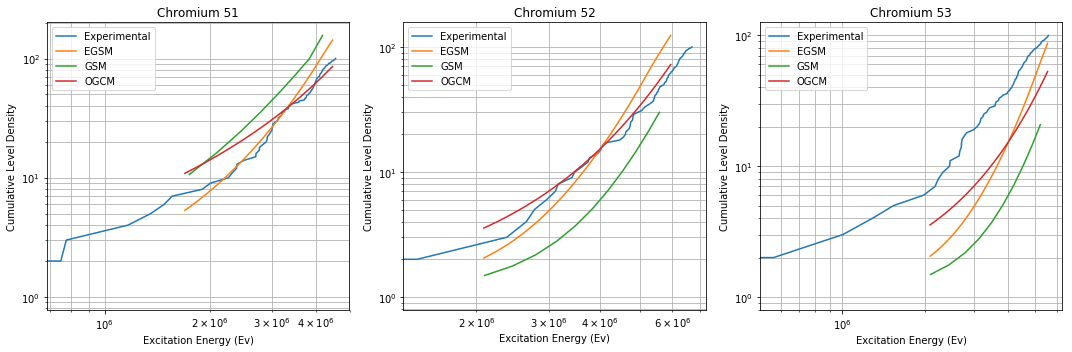

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for enum in enumerate(nuc):
    n = enum[0]
    nuclei = enum[1]
    
    ld_models = nuc[nuclei]
    x = exp_data[nuclei][0][:100]
    y = exp_data[nuclei][1][:100]
    p = axes[n].plot(x, y, label='Experimental')

    exp_max = exp_data[nuclei][0][100]
    for models in ld_models:
        
        findex = np.argmin(np.abs(ld_models[models][:,0] - exp_max))
        x = ld_models[models][0:findex,0]
        y = ld_models[models][0:findex,1]
        
        p = axes[n].semilogy(x, y, label=models)
        
axes[0].set_title('Chromium 51')
axes[1].set_title('Chromium 52')
axes[2].set_title('Chromium 53')
        
for i in range(3):
    axes[i].set_xlabel('Excitation Energy (Ev)')
    axes[i].set_xscale('log')
    axes[i].set_ylabel('Cumulative Level Density')
    axes[i].legend()
    axes[i].grid(which='both')

plt.tight_layout()
fig.savefig('levden.png', dpi=300)

In [89]:
with open('cr53.dat', 'r') as f:
    data = list(f)

new_data = []
for line in data:
    if line.startswith('                                       '): continue
    
    new_line = line.strip().split()[0:2]
    new_data.append(new_line)
    
# x_data = []
# y_data = []
# for line in new_data[1:]:
#     sline = line.split()
#     index = sline[0]
#     excitation_energy = sline[1]
#     y_data.append(int(index))
#     x_data.append(float(excitation_energy))

In [90]:
x_data = []
y_data = []

for coord in new_data:
    y_coord = float(coord[0])
    x_coord = float(coord[1])*1e6
    x_data.append(x_coord)
    y_data.append(y_coord)

In [91]:
cr53_exp = [x_data, y_data]

In [129]:
exp_data = {'Cr051' : cr51_exp,
            'Cr052' : cr52_exp,
            'Cr053' : cr53_exp}

In [79]:
x_data = []
for ed in exp_data.items():
    for val in ed[1][0]:
        xval = val*1000000
        x_data.append(val)
    
print(x_data)

MemoryError: 

In [112]:
def zvd_parse(data_tuple):

            data_path = data_tuple[0]
        
            fun = data_tuple[1]
            material = data_tuple[2]
            

            init = start_parse(data_tuple)

            data_segment = end_parse(init)

            
            return data_segment



def start_parse(data_tuple):
    
    data_path = data_tuple[0]
    
    init_line = 'fun: Integral [RHO(U)]'
    

    with open(data_path, 'r') as f:
        itemdata = list(f)
        print(itemdata)

        for line in enumerate(itemdata):

            val = line[1]
            n = line[0]
            
            
            if init_line in val:
                cropped_data = itemdata[n+5:]
                return cropped_data
            
def end_parse(data):

    for line in enumerate(data):
        
        n = line[0]
        val = line[1]
        
        if "#end" in val:
            calc_data = data[:n-1]
            return calc_data

In [119]:
ld_dir = glob.glob('/home/agolas/empire/work/cr52/EGSM/*/*.zvd')

In [126]:
NL = {}
prod = ['Cr051', 'Cr052','Cr053']
ldm = ['EGSM']

fun_type = {'LD' : 'fun: RHO(U)   at GS',
            'NL' : 'fun: Integral [RHO(U)] of'}

for d in ld_dir:
    dd = d.split('/')
    
    
    f = dd[8]
    ld = f[8:12]
    st = f[5:7]
    mat = f[13:18]
    
    if mat not in prod:
        continue
    if 'LD' in st:
        continue
    if dd[7] in ldm:
        continue
        
    dat_tup = (d, st, mat, ld, dd[7])    
    
    key = '{}_{}_{}_{:1.4s}'.format(st, mat, ld, dd[7])
    
    
    
    str_data = zvd_parse(dat_tup)
    array_data = []
    print(str_data)
    
    for line in str_data:
        line = line.replace('\n','')
        line = line.strip()
        ll = line.split('        ')
        fl = [0, 0]
        fl[0] = float(ll[0])
        fl[1] = float(ll[1])
        
        array_data.append(fl)

    print(array_data)
    data_array = np.array(array_data)
    NL[key] = data_array
    
    

['#begin LSTTAB.CUR/u\n', '       fun: Exp Cumul Discrete Levels of Cr053\n', 'thick: 2\n', 'length:250\n', '//\n', ' 0.0 1.0\n', '   564030.00000000000        1.00000000\n', '   564030.00000000000        2.00000000\n', '   1006270.0000000000        2.00000000\n', '   1006270.0000000000        3.00000000\n', '   1289520.0000000000        3.00000000\n', '   1289520.0000000000        4.00000000\n', '   1536620.0000000000        4.00000000\n', '   1536620.0000000000        5.00000000\n', '   1973660.0000000000        5.00000000\n', '   1973660.0000000000        6.00000000\n', '   2172330.0000000000        6.00000000\n', '   2172330.0000000000        7.00000000\n', '   2233160.0000000000        7.00000000\n', '   2233160.0000000000        8.00000000\n', '   2320710.0000000000        8.00000000\n', '   2320710.0000000000        9.00000000\n', '   2453100.0000000000        9.00000000\n', '   2453100.0000000000        10.0000000\n', '   2462000.0000000000        10.0000000\n', '   2462000.000

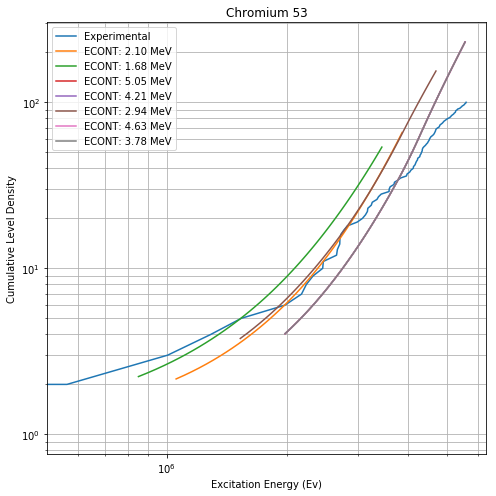

In [169]:
eng = ['2.10', '1.68', '5.05', '4.21', '2.94', '4.63', '3.78']
prod = ['Cr053']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

for enum in enumerate(prod):
    n = enum[0]
    p = enum[1]
    x = exp_data[p][0][:100]
    y = exp_data[p][1][:100]
    
    pl = axes.semilogy(x, y, label='Experimental')
    exp_max = exp_data[p][0][100]
    for econt in eng:
        
        key = 'NL_{}_EGSM_{}'.format(p, econt)
        label = 'ECONT: {} MeV'.format(econt)
        
        
        findex = np.argmin(np.abs(NL[key][:,0] - exp_max))
        x = NL[key][0:findex,0]
        y = NL[key][0:findex,1]
               
        pl = axes.semilogy(x, y, label=label)
        
axes.set_title('Chromium 53')
#axes[1].set_title('Chromium 52')
#axes[2].set_title('Chromium 53')
        
#for i in range(3):
axes.set_xlabel('Excitation Energy (Ev)')
axes.set_xscale('log')
axes.set_ylabel('Cumulative Level Density')
axes.legend()
axes.grid(which='both')

plt.tight_layout()
fig.savefig('econt53.png', dpi=300)

In [153]:
print(NL.keys())

['NL_Cr051_EGSM_2.52', 'NL_Cr053_EGSM_2.52', 'NL_Cr053_EGSM_7.57', 'NL_Cr053_EGSM_7.15', 'NL_Cr053_EGSM_2.10', 'NL_Cr051_EGSM_2.10', 'NL_Cr053_EGSM_1.68', 'NL_Cr052_EGSM_5.89', 'NL_Cr052_EGSM_5.05', 'NL_Cr053_EGSM_5.47', 'NL_Cr052_EGSM_6.73', 'NL_Cr051_EGSM_8.0', 'NL_Cr053_EGSM_6.31', 'NL_Cr053_EGSM_4.21', 'NL_Cr053_EGSM_6.73', 'NL_Cr052_EGSM_4.21', 'NL_Cr051_EGSM_2.94', 'NL_Cr052_EGSM_2.94', 'NL_Cr053_EGSM_4.63', 'NL_Cr052_EGSM_3.36', 'NL_Cr052_EGSM_8.0', 'NL_Cr052_EGSM_6.31', 'NL_Cr052_EGSM_4.63', 'NL_Cr052_EGSM_3.78', 'NL_Cr053_EGSM_3.36', 'NL_Cr052_EGSM_7.57', 'NL_Cr052_EGSM_7.15', 'NL_Cr051_EGSM_7.15', 'NL_Cr051_EGSM_5.47', 'NL_Cr051_EGSM_5.05', 'NL_Cr051_EGSM_3.78', 'NL_Cr053_EGSM_3.78', 'NL_Cr053_EGSM_8.0', 'NL_Cr053_EGSM_2.94', 'NL_Cr053_EGSM_5.05', 'NL_Cr051_EGSM_4.21', 'NL_Cr052_EGSM_5.47', 'NL_Cr051_EGSM_6.31', 'NL_Cr051_EGSM_4.63', 'NL_Cr051_EGSM_5.89', 'NL_Cr051_EGSM_1.26', 'NL_Cr053_EGSM_5.89', 'NL_Cr051_EGSM_1.68', 'NL_Cr051_EGSM_7.57', 'NL_Cr051_EGSM_3.36', 'NL_Cr051_EG

In [149]:
exp_data['Cr053'][0][100]

5624000.0